<a href="https://colab.research.google.com/github/mohamedyosef101/101_learning_area/blob/area/Time%20Series/airbnb_paris_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis** with Airbnb Paris Reviews data
This is me following [Pydata LA 2018 Tutorial](https://youtu.be/JntA9XaTebs?si=PV4DMpbuHljg6WK9) by [Tamara Louie](https://www.linkedin.com/in/tklouie/)

# 1. Get the data
**Source**: [Inside Airbnb](http://insideairbnb.com/get-the-data/). *choose any city and download the file with the name `reviews.csv`*

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

# set the visualization style
sns.set_theme(style='darkgrid')

# read the data
URL = 'http://data.insideairbnb.com/france/ile-de-france/paris/2023-12-12/visualisations/reviews.csv'
data = pd.read_csv(URL)
data.head()

,listing_id,date
0,3109,2017-10-28
1,3109,2017-11-03
2,3109,2018-07-24
3,3109,2019-10-24
4,5396,2009-06-30


# 2. **Look** at the data

In [2]:
# How many rows and columns are in this dataset
data.shape

(1721452, 2)

In [3]:
# what data types are the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721452 entries, 0 to 1721451
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
dtypes: int64(1), object(1)
memory usage: 26.3+ MB


In [4]:
# Is the data complete? Are there nulls? Do we have to infer values?
data.isnull().any()

listing_id    False
date          False
dtype: bool

**What is the definition of these columns?**
* `listing_id`: a unique identifier for the listings
* `date`: time points when data recording


# 3. Data Preprocessing

In [15]:
# Rename columns
data = data.rename(columns = {'date': 'ds', 'listing_id': 'ts'})

# group data by the number of listings per date
example = data.groupby(by = 'ds').agg({'ts': 'count'})

# change index to datetime
example.index = pd.to_datetime(example.index)

# set the frequency to be one day
example = example.asfreq(freq='D')

# make sure that the data is sorted
example = example.sort_index(ascending=True)

# fill nan values with 0
example = example.fillna(value=0)

# show the data example
example.head(10)

,ts
ds,
2009-06-30,1.0
2009-07-01,0.0
2009-07-02,0.0
2009-07-03,1.0
2009-07-04,0.0
2009-07-05,0.0
2009-07-06,0.0
2009-07-07,0.0
2009-07-08,1.0


# 4. Visualize the data

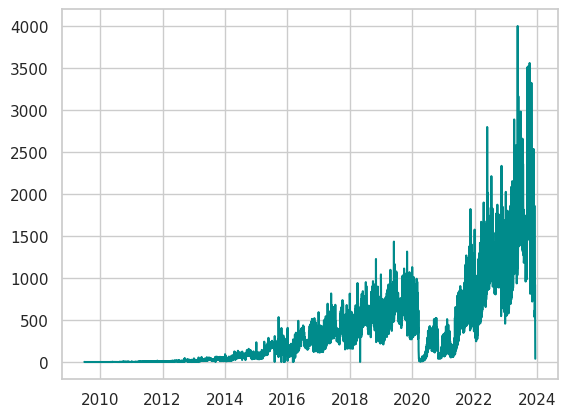

In [37]:
plt.plot(example['ts'], color="darkcyan")
plt.grid(True)